# Algorithmes de recommandation
Il s'agit d'un cas très classique d'algorithme utilisé dans le web marketing. Un client choisit et met dans ses favoris un article, ou dans son panier. Le site lui propose des articles compatibles, ou similaires. La recommandation peut être basée sur la description de ces articles. L'algorithme va alors chercher les articles qui ont le plus de points communs dans leur description; c'est à dire le plus de mots communs dans leur descrition.

![recommandation d'articles](datas/articlesCompatibles.png)

La première étape pour calculer les similarités consiste à découper les descriptions en listes de mots (c'est la tokenisation) puis à prendre les racines des mots, les stems.

In [1]:
texte = """
Mardi 20 février, à la médiathèque des Mureaux (Yvelines), le chef de l’Etat a accompagné
la locataire de la rue de Valois pour la remise officielle du rapport
sur les bibliothèques, rédigé par leur ami commun, l’académicien
Erik Orsenna, avec le concours de Noël Corbin, inspecteur général
des affaires culturelles. L’occasion de présenter les premières
mesures en faveur d’un « plan bibliothèques ».
"""

In [2]:
import re
def decoupe(texte):
    """
    utilise une expression regulière pour découper le texte (en paramètre) : 
    - le découpage se fait en fonction de ; ou , ou ' ou \n ou un (ou +) espaces
    - on conserve enfin les stems qui font 4 caractères ou plus
    la fonction retourne une liste de stems
    un stem peut être présent plusieurs fois dans la liste retournée
    """
    texte_decoupe = list(re.split('; |, |\' |\n |\s+',texte))
    texte_mini=[]
    for t in texte_decoupe:
        match = re.match('[a-z]{4,}',t)
        if match!=None:
            texte_mini.append(match.group(0))
    return texte_mini


In [3]:
texte_mini = decoupe(texte)
texte_mini

['chef',
 'accompagn',
 'locataire',
 'pour',
 'remise',
 'officielle',
 'rapport',
 'biblioth',
 'leur',
 'commun',
 'avec',
 'concours',
 'inspecteur',
 'affaires',
 'culturelles',
 'premi',
 'mesures',
 'faveur',
 'plan',
 'biblioth']

In [4]:
import pandas as pd
df = pd.read_csv("datas/descriptif.csv", sep=";")

In [5]:
df

,bande dessinee,roman,ordinateur,console de jeux
0,une bande dessinee est un ouvrage illustre rac...,un roman est un ouvrage avec du texte raconte...,un ordinateur est un dispositif pour produire ...,une console de jeu est un dispositif pour joue...


In [6]:
# on créé une liste contenant les articles : 
col = list(df.keys())
# on créé une liste (descriptif) contenant, pour chaque article, une liste avec TOUS les mots retenus dans la description
descriptif = []
for cle in col:
    desc = df[cle][0]
    descriptif.append(decoupe(desc))


In [7]:
descriptif

[['bande',
  'dessinee',
  'ouvrage',
  'illustre',
  'racontant',
  'histoire',
  'images',
  'aventure',
  'fantaisie',
  'lire'],
 ['roman',
  'ouvrage',
  'avec',
  'texte',
  'raconte',
  'histoire',
  'biogaphie',
  'aventure',
  'documentaire',
  'lire'],
 ['ordinateur',
  'dispositif',
  'pour',
  'produire',
  'consulter',
  'objets',
  'numeriques',
  'communiquer',
  'calculer',
  'jouer',
  'lire',
  'videos'],
 ['console',
  'dispositif',
  'pour',
  'jouer',
  'jeux',
  'videos',
  'lire',
  'videos',
  'aventure',
  'fantaisie']]

# Vecteurs
L'étape suivante consiste à stocker chacune des descriptions traitées sous forme de vecteurs en base de données.

Chaque ligne est un vecteur qui correspond à une description, chaque colonne correspond à un stem.

La fonction `mots` retourne une liste contenant tous les mots de `descriptif`, de manière unique. (les mots qui apparaissent plusieurs fois dans `descriptif` ne sont renvoyés qu'une seule fois dans la liste `mot`

La fonction `tab` créé un tableau où les lignes correspondent au nombre d'occurences de ce mot dans la description de l'objet. La ligne de rang 1 correspond aux occurences pour le premier objet de la description, la ligne de rang 2 au 2e objet de la description,...

Pour avoir des valeurs normalisées, on transforme ces occurences en une frequence : 
$$f(mot) = \tfrac{nb\quad occurences}{nb\quad mots}$$

In [8]:
def mots(descriptif):
    """
    retourne la liste de tous les mots de descriptif, de manière unique, dans une seule liste
    """
    liste_de_mots = []
    for desc in descriptif:
        for i in desc : 
            if not(i in liste_de_mots):
                liste_de_mots.append(i)
    return liste_de_mots

mots(descriptif)

['bande',
 'dessinee',
 'ouvrage',
 'illustre',
 'racontant',
 'histoire',
 'images',
 'aventure',
 'fantaisie',
 'lire',
 'roman',
 'avec',
 'texte',
 'raconte',
 'biogaphie',
 'documentaire',
 'ordinateur',
 'dispositif',
 'pour',
 'produire',
 'consulter',
 'objets',
 'numeriques',
 'communiquer',
 'calculer',
 'jouer',
 'videos',
 'console',
 'jeux']

In [9]:
def tab(descriptif):
    """
    retourne la liste tableau avec les occurences pour chaque article (chaque rang) 
    des mots retenus (mots)
    une colonne par mot
    """
    tableau = []
    mots_elements = mots(descriptif)
    for desc in descriptif:
        ligne = []
        nombre_de_mots = len(desc)
        ligne = [desc.count(mot)/nombre_de_mots for mot in mots_elements]
        tableau.append(ligne)
    return tableau
tableau = tab(descriptif)
print(tableau)

[[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0, 0.1, 0.0, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08333333333333333, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, 0.1, 0.1]]


In [10]:
# visualisation
df2=pd.DataFrame(tableau,index=col,columns=mots(descriptif))
df2

,bande,dessinee,ouvrage,illustre,racontant,histoire,images,aventure,fantaisie,lire,...,produire,consulter,objets,numeriques,communiquer,calculer,jouer,videos,console,jeux
bande dessinee,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
roman,0.0,0.0,0.1,0.0,0.0,0.1,0.0,0.1,0.0,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
ordinateur,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,...,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.083333,0.0,0.0
console de jeux,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.1,0.100000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.200000,0.1,0.1


# Calcul des similarités
La dernière étape est celle du calcul des similarités. Cela consiste à appliquer la similarité cosinus 2 à 2 pour tous les produits de la base de données : 
$$s_{ij}=\tfrac{u_i\cdot u_j}{||ui||\cdot||uj||}$$

On cherche alors une règle de similitude, du type : A=>B (si on aime A alors on aurait tendance à aussi apprécier B)

In [11]:
import numpy as np
def cosij(ui,uj):
    """
    retourne le resultat du calcul de s_ij pour 2 valeurs ui(i) et uj(j)
    paramètres :
    les vecteurs ui et uj de modules mod(ui) et mod(uj)
    """
    s=0
    for i in range(len(ui)):
        s += ui[i]*uj[i]/(mod(ui)*mod(uj))
    return s

def mod(u):
    """
    calcule le module du vecteur mis en paramètre
    """
    s=0
    for i in range(len(u)):
        s += u[i]*u[i]
    s = s**0.5
    return s

def matrice_cos(A,B):
    """
    retourne la matrice de similitude entre 2 listes 
    de dimension 2 (liste de liste), A et B mises en paramètre
    """
    C = np.zeros(shape=(len(A),len(B)))
    for i in range(len(A)):
        for j in range(len(B)):
            C[i,j]=cosij(A[i],B[j])
    return C

mat=matrice_cos(tableau,tableau)
mat

array([[1.        , 0.4       , 0.09128709, 0.27386128],
       [0.4       , 1.        , 0.09128709, 0.18257419],
       [0.09128709, 0.09128709, 1.        , 0.5       ],
       [0.27386128, 0.18257419, 0.5       , 1.        ]])

In [12]:
# visualisation du tableau grace à son DataFrame
df3=pd.DataFrame(mat,index=col,columns=col)
df3

,bande dessinee,roman,ordinateur,console de jeux
bande dessinee,1.000000,0.400000,0.091287,0.273861
roman,0.400000,1.000000,0.091287,0.182574
ordinateur,0.091287,0.091287,1.000000,0.500000
console de jeux,0.273861,0.182574,0.500000,1.000000


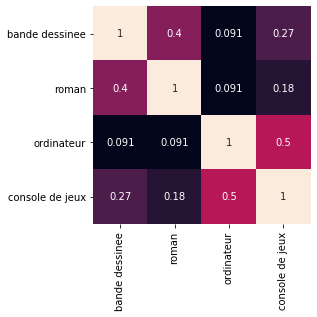

In [15]:
# visualisation à l'aide d'un outil en couleur
import seaborn as sns
import matplotlib.pyplot as plt
col = list(df3.keys())
sns.heatmap(mat, square=True, annot=True, cbar=False
            , xticklabels=list(col)
            , yticklabels=list(col))

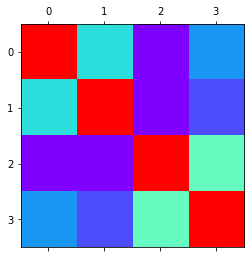

In [16]:
# visualisation avec matplotlib (un peu moins lisible)
plt.matshow(mat, cmap='rainbow');

## Interpretation
On voit assez facilement que :

* la *bande dessinée* est proche dans sa description avec le *roman*, avec un score de 0.4, et un un peu moins proche de la *console de jeux* (score de 0.27)
* l'*ordinateur* est compatible avec la *console de jeux*, avec un score de 0.5 
* La description de la *bande dessinnée* et du *roman* ne contient presque aucun point commun avec l'*ordinateur*



In [17]:
def articles(tab):
    tab=tab.sort_values(ascending=False)
    articles = list(tab.index.values)
    recom = 'l\'article \033[1m {0:15} \033[0;0m est similaire à \033[1m{1:15}\033[0;0m voire peut être un peu à \033[1m{2:15}\033[0;0m'.format(articles[0],articles[1],articles[2])
    return recom

def recommandation(dataf):
    texte=[]
    col = list(dataf.keys()) 
    for c in col:
        tab_red=[]
        tab_red = dataf[c]
        texte.append(articles(tab_red))
    return texte

texte = recommandation(df3)
for t in texte:
    print(t)

l'article  bande dessinee   est similaire à roman           voire peut être un peu à console de jeux
l'article  roman            est similaire à bande dessinee  voire peut être un peu à console de jeux
l'article  ordinateur       est similaire à console de jeux voire peut être un peu à roman          
l'article  console de jeux  est similaire à ordinateur      voire peut être un peu à bande dessinee 


# definir des classes à l'aide d'une représentation en graphe


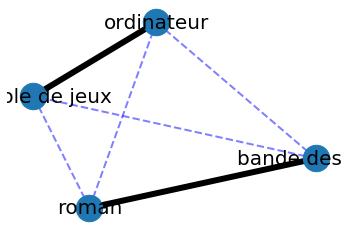

In [289]:
import matplotlib.pyplot as plt
import networkx as nx

mat=matrice_cos(tableau,tableau)
col = list(df3.keys())

G = nx.Graph()

def makeG(mat,col):
    """
    creation du graphe G à partir : 
    - du paramètre col : la liste des lés (colonnes) du DataFrame fg3 (equiv à la matrice de similitude)
    - du paramètre mat : la matrice de similitude déjà calculée
    Les noeuds du graphe sont constitués à partir des articles
    Les arêtes sont pondérés d'un poids weight qui est la valeur lue dans la matrice de similitude mat
    """
    for i in range(len(mat[:,0])):
        for j in range(len(mat[0,:])):
            G.add_edge(col[i], col[j], weight=mat[i,j])
    return G


    

#G.add_edge('a', 'b', weight=0.6)


def drawG(G,seuil):
    """
    segmentation de arêtes en fonction du paramètre seuil
    - les arêtes de weight >= seuil sont représentées en trait plein sur le graphe
    - celle de weight < seuil sont représentées en trait pointillé
    """
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] >= seuil]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] < seuil]
    pos = nx.spring_layout(G)  # positions for all nodes
    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)
    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge,width=6)
    nx.draw_networkx_edges(G, pos, edgelist=esmall,width=2, alpha=0.5, edge_color='b', style='dashed')
    # labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
    plt.axis('off')
    plt.show()
    
G = makeG(mat,col)
drawG(G,0.3)

## Interprétation
Il apparait ici clairement 2 classes en choisissant seuil = 0.3 : 
    
* les articles du genre littérature
* les articles du genre électronique

# Classification
L'arbre de classification peut être utile dans le cas 
L’apprentissage par arbre de décision désigne une méthode basée sur l'utilisation d'un arbre de décision comme modèle prédictif. Dans ces structures d'arbre, les feuilles représentent les valeurs de la variable-cible (les classes) et les embranchements correspondent à des combinaisons de variables d'entrée qui mènent à ces valeurs. En analyse de décision, un arbre de décision peut être utilisé pour représenter de manière explicite les décisions réalisées et les processus qui les amènent.

Une des variables d'entrée est sélectionnée à chaque nœud intérieur (ou interne, nœud qui n'est pas terminal) de l'arbre selon une méthode qui dépend de l'algorithme.

L'arbre est en général construit en séparant l'ensemble des données en sous-ensembles en fonction de la valeur d'une caractéristique d'entrée. Il est construit de manière récursive. C'est un algorithme glouton.

Plus de détail : [https://fr.wikipedia.org/wiki/Arbre_de_décision_(apprentissage)](https://fr.wikipedia.org/wiki/Arbre_de_décision_(apprentissage))

Il existe ainsi les :

* arbres de classification (feuille = classe)
* arbres de regression, qui permettent de prédire une quantité réelle 

Les algorithmes pour construire les arbres de décision sont construits en divisant l'arbre du sommet vers les feuilles en choisissant à chaque étape une variable d'entrée qui réalise le meilleur partage de l'ensemble d'objets, comme décrit précédemment. Pour choisir la variable de séparation sur un nœud, les algorithmes testent les différentes variables d'entrée possibles et sélectionnent celle qui maximise un critère donné.